**Первая часть практики Python**

In [1]:
import pandas as pd

In [ ]:
# загружаю данные и называю колонки

In [2]:
df_ratings = pd.read_csv('u.data.csv', sep = '\t', names = ["user_id", "item_id", "rating", "timestamp"], encoding = "ISO-8859-1")
df_ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
df_movies = pd.read_csv('u.item.csv', sep = '|', names = ["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western" ], encoding = "ISO-8859-1")
df_movies

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_ratings.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [ ]:
#создаю таблицу с данными по пользователям и сортирую, чтобы найти пользователя с максимальным количеством оценок

In [5]:
df_users = df_ratings.groupby(['user_id']).count ().sort_values ('rating')
df_users

,item_id,rating,timestamp
user_id,,,
202,20,20,20
441,20,20,20
685,20,20,20
34,20,20,20
36,20,20,20
...,...,...,...
276,518,518,518
450,540,540,540
13,636,636,636


In [ ]:
#создаю таблицу самого активного пользователя

In [6]:
df_user_max = df_ratings[df_ratings ['user_id'] == 405]
df_user_max

,user_id,item_id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447
...,...,...,...,...
98956,405,375,1,885546835
98978,405,445,4,885548435
99148,405,1246,1,885547735
99465,405,196,1,885546112


In [ ]:
#создаю фукцию для подсчета количества и суммы оценок для каждого фильма

In [7]:
agg_func_rating = {
    'rating': ['count','sum']
}

In [8]:
#создаю таблицу с количеством и суммой оценок по фильмам

In [8]:
df_movies_rank = df_ratings.groupby('item_id').agg(agg_func_rating).reset_index ()
df_movies_rank

item_id rating      
              count   sum
0          1    452  1753
1          2    131   420
2          3     90   273
3          4    209   742
4          5     86   284
...      ...    ...   ...
1677    1678      1     1
1678    1679      1     3
1679    1680      1     2
1680    1681      1     3
1681    1682      1     3

[1682 rows x 3 columns]

In [9]:
df_movies_rank.columns = ['item_id','rating_count','rating_sum']
df_movies_rank

,item_id,rating_count,rating_sum
0,1,452,1753
1,2,131,420
2,3,90,273
3,4,209,742
4,5,86,284
...,...,...,...
1677,1678,1,1
1678,1679,1,3
1679,1680,1,2
1680,1681,1,3


In [ ]:
#добавляю таблицу с жанрами к таблице с данными по самому активному пользователю

In [10]:
df_user_max = df_user_max.merge (df_movies, left_on = 'item_id', right_on = 'movie_id', how = 'left')
df_user_max

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,56,4,885544911,56,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,0,...,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,592,True Crime (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?True%20Crime%...,0,...,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,1582,T-Men (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?T-Men%20(1947),0,...,0,1,0,0,0,0,0,0,0,0
3,405,171,1,885549544,171,Delicatessen (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Delicatessen%...,0,...,0,0,0,0,0,0,1,0,0,0
4,405,580,1,885547447,580,"Englishman Who Went Up a Hill, But Came Down a...",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Englishman%20...,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,405,375,1,885546835,375,Showgirls (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Showgirls%20(...,0,...,0,0,0,0,0,0,0,0,0,0
733,405,445,4,885548435,445,"Body Snatcher, The (1945)",01-Jan-1945,NaN,http://us.imdb.com/M/title-exact?Body%20Snatch...,0,...,0,0,1,0,0,0,0,0,0,0
734,405,1246,1,885547735,1246,Bushwhacked (1995),01-Jan-1995,NaN,http://us.imdb.com/Title?Bushwhacked+(1995/I),0,...,0,0,0,0,0,0,0,0,0,0
735,405,196,1,885546112,196,Dead Poets Society (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Dead%20Poets%...,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#оставляю нужные колонки

In [11]:
df_user_genres = df_user_max [['rating','user_id', 'movie_id','release_date', 'Action', 'Adventure', 'Animation', 
                                 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
df_user_genres     

,rating,user_id,movie_id,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,405,56,01-Jan-1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,405,592,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,405,1582,01-Jan-1947,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,405,171,01-Jan-1991,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,405,580,01-Jan-1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,1,405,375,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,4,405,445,01-Jan-1945,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
734,1,405,1246,01-Jan-1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
735,1,405,196,01-Jan-1989,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# добавляю столбцы с количеством и суммой оценок по фильмам

In [12]:
df_user_movies = df_user_genres.merge (df_movies_rank, left_on = 'movie_id', right_on = 'item_id', how = 'left')
df_user_movies

,rating,user_id,movie_id,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,item_id,rating_count,rating_sum
0,4,405,56,01-Jan-1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,56,394,1600
1,1,405,592,01-Jan-1995,0,0,0,0,0,0,...,0,1,0,0,1,0,0,592,9,30
2,1,405,1582,01-Jan-1947,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1582,1,1
3,1,405,171,01-Jan-1991,0,0,0,0,1,0,...,0,0,0,1,0,0,0,171,65,252
4,1,405,580,01-Jan-1995,0,0,0,0,1,0,...,0,0,1,0,0,0,0,580,32,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,1,405,375,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,375,23,45
733,4,405,445,01-Jan-1945,0,0,0,0,0,0,...,0,0,0,0,0,0,0,445,22,77
734,1,405,1246,01-Jan-1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1246,7,11
735,1,405,196,01-Jan-1989,0,0,0,0,0,0,...,0,0,0,0,0,0,0,196,251,983


In [13]:
df_user_movies.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        737 non-null    int64 
 1   user_id       737 non-null    int64 
 2   movie_id      737 non-null    int64 
 3   release_date  737 non-null    object
 4   Action        737 non-null    int64 
 5   Adventure     737 non-null    int64 
 6   Animation     737 non-null    int64 
 7   Childrens     737 non-null    int64 
 8   Comedy        737 non-null    int64 
 9   Crime         737 non-null    int64 
 10  Documentary   737 non-null    int64 
 11  Drama         737 non-null    int64 
 12  Fantasy       737 non-null    int64 
 13  Film-Noir     737 non-null    int64 
 14  Horror        737 non-null    int64 
 15  Musical       737 non-null    int64 
 16  Mystery       737 non-null    int64 
 17  Romance       737 non-null    int64 
 18  Sci-Fi        737 non-null    int64 
 19  Thriller

In [ ]:
# привожу колонку с датой в нужный формат

In [14]:
df_user_movies['release_date']= pd.to_datetime(df_user_movies['release_date'])
df_user_movies.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rating        737 non-null    int64         
 1   user_id       737 non-null    int64         
 2   movie_id      737 non-null    int64         
 3   release_date  737 non-null    datetime64[ns]
 4   Action        737 non-null    int64         
 5   Adventure     737 non-null    int64         
 6   Animation     737 non-null    int64         
 7   Childrens     737 non-null    int64         
 8   Comedy        737 non-null    int64         
 9   Crime         737 non-null    int64         
 10  Documentary   737 non-null    int64         
 11  Drama         737 non-null    int64         
 12  Fantasy       737 non-null    int64         
 13  Film-Noir     737 non-null    int64         
 14  Horror        737 non-null    int64         
 15  Musical       737 non-null    int64     

In [15]:
df_user_movies.head ()

,rating,user_id,movie_id,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,item_id,rating_count,rating_sum
0,4,405,56,1994-01-01,0,0,0,0,0,1,...,0,0,0,0,0,0,0,56,394,1600
1,1,405,592,1995-01-01,0,0,0,0,0,0,...,0,1,0,0,1,0,0,592,9,30
2,1,405,1582,1947-01-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1582,1,1
3,1,405,171,1991-01-01,0,0,0,0,1,0,...,0,0,0,1,0,0,0,171,65,252
4,1,405,580,1995-01-01,0,0,0,0,1,0,...,0,0,1,0,0,0,0,580,32,108


In [16]:
df_user_movies['release_date'] = df_user_movies['release_date'].dt.year

In [17]:
df_user_movies.head()

,rating,user_id,movie_id,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,item_id,rating_count,rating_sum
0,4,405,56,1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,56,394,1600
1,1,405,592,1995,0,0,0,0,0,0,...,0,1,0,0,1,0,0,592,9,30
2,1,405,1582,1947,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1582,1,1
3,1,405,171,1991,0,0,0,0,1,0,...,0,0,0,1,0,0,0,171,65,252
4,1,405,580,1995,0,0,0,0,1,0,...,0,0,1,0,0,0,0,580,32,108


In [ ]:
#загружаем библиотеку для деления выборки

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
#очищаем данные от пустых значений

In [19]:
df_user_movies = df_user_movies.dropna()

In [ ]:
#создаём массив данных с предикторами

In [20]:
X = df_user_movies.iloc[:,3:]
X.head ()

,release_date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,item_id,rating_count,rating_sum
0,1994,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,56,394,1600
1,1995,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,592,9,30
2,1947,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1582,1,1
3,1991,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,171,65,252
4,1995,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,580,32,108


In [ ]:
#создаём зависимую переменную

In [21]:
Y = df_user_movies.iloc[:,0]
Y.head

<bound method NDFrame.head of 0      4
1      1
2      1
3      1
4      1
      ..
732    1
733    4
734    1
735    1
736    1
Name: rating, Length: 737, dtype: int64>

In [22]:
#делим выборки

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# приводим данные к одному масштабу

In [30]:
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
import matplotlib.pyplot as plt

In [ ]:
#cтроим график для визуального понимания зависимости независимой и зависимой переменной (проверила несколько, тут представлена одна из них)

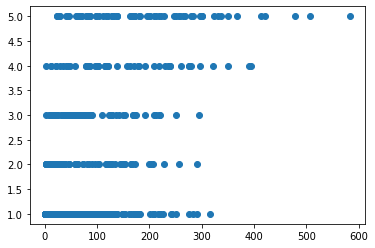

In [33]:
plt.scatter(
    df_user_movies ['rating_count'],
    df_user_movies ['rating']
)

In [ ]:
#поскольку зависимая пременная дискретна, возьмём модель логистической регрессии

In [34]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#выбираем классификатор, подходящий для нашей зависимой переменной

In [35]:
classifier = LogisticRegression(solver='liblinear',random_state=0)

In [36]:
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#тестируем выбранный классификатор

In [37]:
predicted_y = classifier.predict(X_test)

In [38]:
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1,
       4, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       4, 4])

In [ ]:
# визуально сравниваем значения

In [39]:
pd.DataFrame ([Y_test.values, predicted_y]).T

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
217,1,1
218,1,1
219,1,1
220,4,4


In [128]:
#проверяем точность прогноза

In [40]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.65


In [ ]:
# не очень высокий показатель точности прогноза, интересно попробовать метод коллаборативной фильтрации

**Вторая часть практики Python**

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.laun

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.2.2/spark-3.2.2-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-3.2.2-bin-hadoop2.7.tgz

spark-3.2.2-bin-hadoop2.7/
spark-3.2.2-bin-hadoop2.7/RELEASE
spark-3.2.2-bin-hadoop2.7/LICENSE
spark-3.2.2-bin-hadoop2.7/NOTICE
spark-3.2.2-bin-hadoop2.7/README.md
spark-3.2.2-bin-hadoop2.7/jars/
spark-3.2.2-bin-hadoop2.7/jars/HikariCP-2.5.1.jar
spark-3.2.2-bin-hadoop2.7/jars/JLargeArrays-1.5.jar
spark-3.2.2-bin-hadoop2.7/jars/JTransforms-3.1.jar
spark-3.2.2-bin-hadoop2.7/jars/RoaringBitmap-0.9.0.jar
spark-3.2.2-bin-hadoop2.7/jars/ST4-4.0.4.jar
spark-3.2.2-bin-hadoop2.7/jars/activation-1.1.1.jar
spark-3.2.2-bin-hadoop2.7/jars/aircompressor-0.21.jar
spark-3.2.2-bin-hadoop2.7/jars/algebra_2.12-2.0.1.jar
spark-3.2.2-bin-hadoop2.7/jars/annotations-17.0.0.jar
spark-3.2.2-bin-hadoop2.7/jars/antlr-runtime-3.5.2.jar
spark-3.2.2-bin-hadoop2.7/jars/antlr4-runtime-4.8.jar
spark-3.2.2-bin-hadoop2.7/jars/aopalliance-1.0.jar
spark-3.2.2-bin-hadoop2.7/jars/aopalliance-repackaged-2.6.1.jar
spark-3.2.2-bin-hadoop2.7/jars/apacheds-i18n-2.0.0-M15.jar
spark-3.2.2-bin-hadoop2.7/jars/apacheds-kerberos-codec

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [ ]:
# загружаю данные в Spark

In [8]:
df_rat = spark.read.csv('u.data.csv', inferSchema=True, header=None, sep = '\t',  encoding = "ISO-8859-1")
df_rat.show ()

+---+----+---+---------+
|_c0| _c1|_c2|      _c3|
+---+----+---+---------+
|196| 242|  3|881250949|
|186| 302|  3|891717742|
| 22| 377|  1|878887116|
|244|  51|  2|880606923|
|166| 346|  1|886397596|
|298| 474|  4|884182806|
|115| 265|  2|881171488|
|253| 465|  5|891628467|
|305| 451|  3|886324817|
|  6|  86|  3|883603013|
| 62| 257|  2|879372434|
|286|1014|  5|879781125|
|200| 222|  5|876042340|
|210|  40|  3|891035994|
|224|  29|  3|888104457|
|303| 785|  3|879485318|
|122| 387|  5|879270459|
|194| 274|  2|879539794|
|291|1042|  4|874834944|
|234|1184|  2|892079237|
+---+----+---+---------+
only showing top 20 rows



In [9]:
df_rat = df_rat.withColumnRenamed('_c0', 'user_id')
df_rat = df_rat.withColumnRenamed('_c1', 'item_id')
df_rat = df_rat.withColumnRenamed('_c2', 'rating')
df_rat = df_rat.withColumnRenamed('_c3', 'timestamp')
df_rat.show ()

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
|    298|    474|     4|884182806|
|    115|    265|     2|881171488|
|    253|    465|     5|891628467|
|    305|    451|     3|886324817|
|      6|     86|     3|883603013|
|     62|    257|     2|879372434|
|    286|   1014|     5|879781125|
|    200|    222|     5|876042340|
|    210|     40|     3|891035994|
|    224|     29|     3|888104457|
|    303|    785|     3|879485318|
|    122|    387|     5|879270459|
|    194|    274|     2|879539794|
|    291|   1042|     4|874834944|
|    234|   1184|     2|892079237|
+-------+-------+------+---------+
only showing top 20 rows



In [10]:
df_mov = spark.read.csv('u.item.csv', inferSchema=True, header=None, sep = '|',  encoding = "ISO-8859-1")
df_mov.show ()

+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|                 _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1|    Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2|    GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|   Four Rooms (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|   Get Shorty (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  

In [11]:
df_mov = df_mov.withColumnRenamed('_c0', 'item_id')
df_mov = df_mov.withColumnRenamed('_c1', 'movie_title')
df_mov = df_mov.withColumnRenamed('_c2', 'release_date')
df_mov = df_mov.withColumnRenamed('_c3', 'video_release_date')
df_mov = df_mov.withColumnRenamed('_c4', 'IMDb_URL')
df_mov = df_mov.withColumnRenamed('_c5', 'unknown')
df_mov = df_mov.withColumnRenamed('_c6', 'Action')
df_mov = df_mov.withColumnRenamed('_c7', 'Adventure')
df_mov = df_mov.withColumnRenamed('_c8', 'Animation')
df_mov = df_mov.withColumnRenamed('_c9', 'Childrens')
df_mov = df_mov.withColumnRenamed('_c10', 'Comedy')
df_mov = df_mov.withColumnRenamed('_c11', 'Crime')
df_mov = df_mov.withColumnRenamed('_c12', 'Documentary')
df_mov = df_mov.withColumnRenamed('_c13', 'Drama')
df_mov = df_mov.withColumnRenamed('_c14', 'Fantasy')
df_mov = df_mov.withColumnRenamed('_c15', 'FilmNoir')
df_mov = df_mov.withColumnRenamed('_c16', 'Horror')
df_mov = df_mov.withColumnRenamed('_c17', 'Musical')
df_mov = df_mov.withColumnRenamed('_c18', 'Mystery')
df_mov = df_mov.withColumnRenamed('_c19', 'Romance')
df_mov = df_mov.withColumnRenamed('_c20', 'SciFi')
df_mov = df_mov.withColumnRenamed('_c21', 'Thriller')
df_mov = df_mov.withColumnRenamed('_c22', 'War')
df_mov = df_mov.withColumnRenamed('_c23', 'Western')
df_mov.show ()

+-------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+--------+------+-------+-------+-------+-----+--------+---+-------+
|item_id|         movie_title|release_date|video_release_date|            IMDb_URL|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|FilmNoir|Horror|Musical|Mystery|Romance|SciFi|Thriller|War|Western|
+-------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+--------+------+-------+-------+-------+-----+--------+---+-------+
|      1|    Toy Story (1995)| 01-Jan-1995|              null|http://us.imdb.co...|      0|     0|        0|        1|        1|     1|    0|          0|    0|      0|       0|     0|      0|      0|      0|    0|       0|  0|      0|
|      2|    GoldenEye (1995)| 01-Jan-1995|              nul

In [ ]:
# Средняя оценка для каждого фильма

In [12]:
df_film_rat_avg = df_rat.groupBy('item_id').avg('rating')
df_film_rat_avg.show ()

+-------+------------------+
|item_id|       avg(rating)|
+-------+------------------+
|    496| 4.121212121212121|
|    471|3.6108597285067874|
|    463| 3.859154929577465|
|    148|          3.203125|
|   1342|               2.5|
|    833| 3.204081632653061|
|   1088| 2.230769230769231|
|   1591|3.1666666666666665|
|   1238|             3.125|
|   1580|               1.0|
|   1645|               4.0|
|    392|3.5441176470588234|
|    623| 2.923076923076923|
|    540| 2.511627906976744|
|    858|               1.0|
|    737| 2.983050847457627|
|    243|2.4393939393939394|
|   1025|2.9318181818181817|
|   1084| 3.857142857142857|
|   1127| 2.909090909090909|
+-------+------------------+
only showing top 20 rows



In [13]:
df_film_rat_avg = df_film_rat_avg.withColumnRenamed('avg(rating)', 'avg_rating')
df_film_rat_avg.show ()

+-------+------------------+
|item_id|        avg_rating|
+-------+------------------+
|    496| 4.121212121212121|
|    471|3.6108597285067874|
|    463| 3.859154929577465|
|    148|          3.203125|
|   1342|               2.5|
|    833| 3.204081632653061|
|   1088| 2.230769230769231|
|   1591|3.1666666666666665|
|   1238|             3.125|
|   1580|               1.0|
|   1645|               4.0|
|    392|3.5441176470588234|
|    623| 2.923076923076923|
|    540| 2.511627906976744|
|    858|               1.0|
|    737| 2.983050847457627|
|    243|2.4393939393939394|
|   1025|2.9318181818181817|
|   1084| 3.857142857142857|
|   1127| 2.909090909090909|
+-------+------------------+
only showing top 20 rows



In [14]:
df_film_rating = df_film_rat_avg.join(df_mov, 'item_id', how='inner')
df_film_rating.show()

+-------+------------------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+--------+------+-------+-------+-------+-----+--------+---+-------+
|item_id|        avg_rating|         movie_title|release_date|video_release_date|            IMDb_URL|unknown|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|FilmNoir|Horror|Musical|Mystery|Romance|SciFi|Thriller|War|Western|
+-------+------------------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+---------+------+-----+-----------+-----+-------+--------+------+-------+-------+-------+-----+--------+---+-------+
|    496| 4.121212121212121|It's a Wonderful ...| 01-Jan-1946|              null|http://us.imdb.co...|      0|     0|        0|        0|        0|     0|    0|          0|    1|      0|       0|     0|      0|      0|      0|    0|      

In [ ]:
# выбриаем нужные столбцы для подсчета среднего по каждому жанру

In [15]:
df_film_rating_genres = df_film_rating.select ('item_id', 'avg_rating', 'movie_title', 'Action', 'Adventure','Animation', 
                                               'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 
                                               'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western')

In [17]:
# создаем цикл для подсчета среднего по каждому жанру

In [16]:
x=0
genres_list = ['Action', 'Adventure','Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 
          'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
for genre in genres_list:
      genre = (genres_list[x])
      df_action_genres = df_film_rating_genres.where(df_film_rating[genre] == 1)
      df_genre = df_action_genres.agg({'avg_rating': 'avg'})
      df_genre = df_genre.withColumnRenamed ('avg(avg_rating)', genre)
      df_genre.show ()
      x += 1


+-----------------+
|           Action|
+-----------------+
|2.966332403758986|
+-----------------+

+----------------+
|       Adventure|
+----------------+
|3.14396731369761|
+----------------+

+-----------------+
|        Animation|
+-----------------+
|3.298813080382377|
+-----------------+

+-----------------+
|        Childrens|
+-----------------+
|2.916884891868898|
+-----------------+

+------------------+
|            Comedy|
+------------------+
|3.0005649618406713|
+------------------+

+-----------------+
|            Crime|
+-----------------+
|3.211014749599754|
+-----------------+

+-----------------+
|      Documentary|
+-----------------+
|3.229273094093941|
+-----------------+

+------------------+
|             Drama|
+------------------+
|3.1873534142973337|
+------------------+

+-----------------+
|          Fantasy|
+-----------------+
|2.849830297920943|
+-----------------+

+------------------+
|          FilmNoir|
+------------------+
|3.5483508757184246|
+-

In [ ]:
# создаём два датафрейма с 5-ю самыми популярными и непопулярными фильмами по оценке

In [17]:
df_film_rat_sum = df_rat.groupBy('item_id').sum('rating')
df_film_rat_sum.show ()

+-------+-----------+
|item_id|sum(rating)|
+-------+-----------+
|    496|        952|
|    471|        798|
|    463|        274|
|    148|        410|
|   1342|          5|
|    833|        157|
|   1088|         29|
|   1591|         19|
|   1238|         25|
|   1580|          1|
|   1645|          4|
|    392|        241|
|    623|        114|
|    540|        108|
|    858|          3|
|    737|        176|
|    243|        322|
|   1025|        129|
|   1084|         81|
|   1127|         32|
+-------+-----------+
only showing top 20 rows



In [35]:
df_film_rat_sum = df_film_rat_sum.withColumnRenamed('sum(rating)', 'sum_rating')

In [ ]:
# получаю датафрейм с 5-ю самыми непопулярными фильмами

In [53]:
df_film_rat_sum_unpop = df_film_rat_sum.orderBy ('sum_rating')
film_rat_sum_unpop_5 = df_film_rat_sum_unpop.take (5)
film_rat_sum_unpop_5

[Row(item_id=1352, sum_rating=1),
 Row(item_id=1561, sum_rating=1),
 Row(item_id=1621, sum_rating=1),
 Row(item_id=830, sum_rating=1),
 Row(item_id=1339, sum_rating=1)]

In [54]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('sparkdf').getOrCreate()

In [56]:
data = film_rat_sum_unpop_5
columns = ['item_id', 'sum_raiting']
df_film_rat_sum_unpop_5 = spark.createDataFrame(data, columns)
df_film_rat_sum_unpop_5.show()

+-------+-----------+
|item_id|sum_raiting|
+-------+-----------+
|   1352|          1|
|   1561|          1|
|   1621|          1|
|    830|          1|
|   1339|          1|
+-------+-----------+



In [ ]:
# получаю датафрейм с 5-ю самыми популярными фильмами

In [28]:
# df_film_rat_sum.orderBy('sum_rating').desc()

In [57]:
df_film_rat_sum_pop = df_film_rat_sum.sort(['sum_rating'], ascending = False)
film_rat_sum_pop_5 = df_film_rat_sum_pop.take (5)
film_rat_sum_pop_5

[Row(item_id=50, sum_rating=2541),
 Row(item_id=100, sum_rating=2111),
 Row(item_id=181, sum_rating=2032),
 Row(item_id=258, sum_rating=1936),
 Row(item_id=174, sum_rating=1786)]

In [58]:
data_2 = film_rat_sum_pop_5
columns_2 = ['item_id', 'sum_raiting']
df_film_rat_sum_pop_5 = spark.createDataFrame(data_2, columns_2)
df_film_rat_sum_pop_5.show()

+-------+-----------+
|item_id|sum_raiting|
+-------+-----------+
|     50|       2541|
|    100|       2111|
|    181|       2032|
|    258|       1936|
|    174|       1786|
+-------+-----------+



In [ ]:
# добавляю названия фильмов для наглядности

In [61]:
df_film_unpop_5 = df_film_rat_sum_unpop_5.join(df_mov, 'item_id', how='left')
df_film_unpop_5 = df_film_unpop_5.select ('item_id', 'movie_title', 'sum_raiting')
df_film_unpop_5.show()

+-------+--------------------+-----------+
|item_id|         movie_title|sum_raiting|
+-------+--------------------+-----------+
|   1352|Shadow of Angels ...|          1|
|   1561|Tigrero: A Film T...|          1|
|   1621|Butterfly Kiss (1...|          1|
|    830|     Power 98 (1995)|          1|
|   1339|Stefano Quantesto...|          1|
+-------+--------------------+-----------+



In [62]:
df_film_pop_5 = df_film_rat_sum_pop_5.join(df_mov, 'item_id', how='left')
df_film_pop_5 = df_film_pop_5.select ('item_id', 'movie_title', 'sum_raiting')
df_film_pop_5.show()

+-------+--------------------+-----------+
|item_id|         movie_title|sum_raiting|
+-------+--------------------+-----------+
|     50|    Star Wars (1977)|       2541|
|    100|        Fargo (1996)|       2111|
|    181|Return of the Jed...|       2032|
|    258|      Contact (1997)|       1936|
|    174|Raiders of the Lo...|       1786|
+-------+--------------------+-----------+

